In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./dataPreprocessed.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,848,849,850,851,852,853,854,855,856,857
0,-0.104383,-0.774381,-0.723237,-0.728497,-0.312177,-0.841625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.110383,-0.774381,-0.723237,-0.728497,1.214743,0.825169,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.007584,0.941010,1.516077,0.370133,0.852806,1.185399,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.106987,0.369213,1.343822,0.254988,0.498189,0.719133,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.110387,-0.774381,-0.723237,-0.728497,0.883411,0.463485,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df.iloc[:,-1] = df.iloc[:,-1].astype('int64')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,848,849,850,851,852,853,854,855,856,857
0,-0.104383,-0.774381,-0.723237,-0.728497,-0.312177,-0.841625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.110383,-0.774381,-0.723237,-0.728497,1.214743,0.825169,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.007584,0.941010,1.516077,0.370133,0.852806,1.185399,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.106987,0.369213,1.343822,0.254988,0.498189,0.719133,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.110387,-0.774381,-0.723237,-0.728497,0.883411,0.463485,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics 
# from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc, f1_score
# from scipy import interp
%matplotlib inline 

In [5]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)    
   
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of MLP classifier on test set: {0}\n'.format(accuracy))

Accuracy of MLP classifier on test set: 0.8003236536905511



/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.65      0.77      5591
           1       0.73      0.95      0.83      5532

    accuracy                           0.80     11123
   macro avg       0.83      0.80      0.80     11123
weighted avg       0.83      0.80      0.80     11123



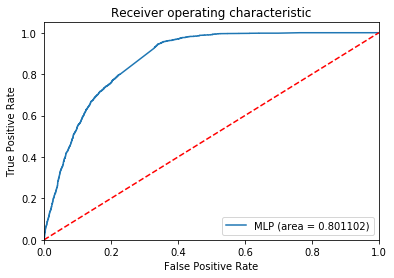

In [7]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MLP (area = %f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

Text(0.5,1,'MLP Classifier')

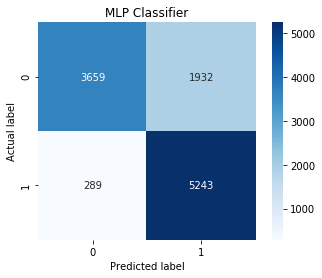

In [8]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('MLP Classifier')

In [9]:
from sklearn.decomposition import PCA

X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]

pca = PCA(n_components=10)
pca.fit(X)  
arr = pca.explained_variance_ratio_ 

sum = 0
for i in range(len(arr)):
    sum += arr[i]
    
print(sum)

0.7483556228401714


In [10]:
X = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [11]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)    

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of MLP classifier on test set: {0}\n'.format(accuracy))

Accuracy of MLP classifier on test set: 0.758788096736492

